In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def swish(x, beta):
    return x * sigmoid(beta * x)

# //sample:
x_values = np.array([0.5, 1.0, 1.5])
beta_value = 1.5  # //adjustable

result = swish(x_values, beta_value)
print(result)



# Trainable Parameter and Swish Activation:
<b>



In the Swish activation function, the parameter `beta` controls the shape of the activation curve. The Swish function is defined as:

# `f(x)=x⋅σ(βx)`

*   The `beta` parameter is trainable because, during the training process, the model adjusts its value based on the optimization objective (minimizing the cost function).
    
*   The optimization algorithm, such as gradient descent, tunes the `beta` parameter to find the values that lead to better model performance.
    

### Role in Reducing Cost:

1.  **Non-Linearity and Model Capacity:**
    
    *   The Swish activation introduces non-linearity to the logistic regression model. This increased non-linearity can enhance the model's capacity to capture complex relationships in the data.
2.  **Adaptive Learning:**
    
    *   By making `beta` trainable, the model can adapt its behavior to the characteristics of the data. The training process fine-tunes `beta` to find the optimal level of non-linearity, potentially reducing the cost associated with misclassifications.
3.  **Improving Feature Representation:**
    
    *   Adjusting `beta` allows the model to learn diverse feature representations. In the context of logistic regression, this can lead to better discrimination between classes, potentially reducing classification errors.

### Avoiding Overfitting:

1.  **Regularization Effect:**
    
    *   The trainable `beta` parameter acts as a form of regularization. By allowing the model to adapt the level of non-linearity, it can prevent the model from becoming too complex and overfitting to the training data.
2.  **Generalization:**
    
    *   The adaptability of `beta` enables the model to generalize well to unseen data. Overfitting often occurs when a model becomes too specific to the training set, and by adjusting `beta` during training, the model can learn a more generalized representation.
3.  **Hyperparameter Tuning:**
    
    *   The `beta` parameter effectively becomes a hyperparameter that the model can tune to balance fitting the training data and avoiding overfitting. This adaptability is particularly useful when the data distribution or characteristics change.

### Summary:

Incorporating a trainable parameter like `beta` in the Swish activation function allows the logistic regression model to dynamically adjust its behavior during training. This adaptability can lead to improved feature representation, potentially reducing the cost associated with misclassifications, and act as a form of regularization to avoid overfitting. .

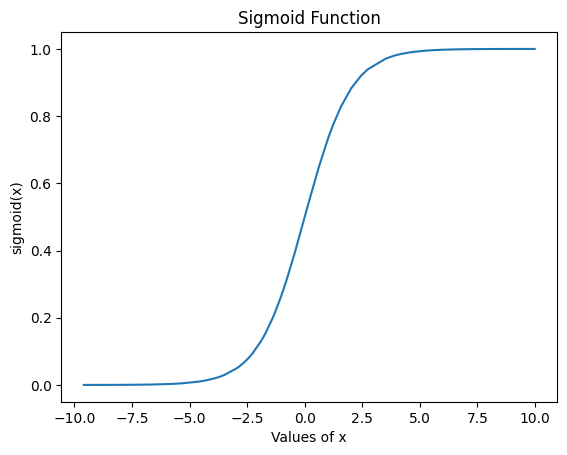

<Figure size 640x480 with 0 Axes>

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Initiate a list of random variables
r_list = np.random.uniform(-10,10,100)

# create sigmoid function
def sigmoid(x):
  return 1/(1+np.exp(-x))

# plotting for Sigmoid function
plt.plot(np.sort(r_list), sorted(sigmoid(np.sort(r_list))))
plt.xlabel('Values of x')
plt.ylabel('sigmoid(x)')
plt.title("Sigmoid Function")
plt.show()
plt.savefig('Sigmoid.png')


In [ ]:
# create Relu function
def relu(x):
  return np.maximum(0, x)

# plotting for Relu function
plt.plot(np.sort(r_list), np.sort(relu(np.sort(r_list))))
plt.xlabel('Values of x')
plt.ylabel('Relu(x)')
plt.title("Relu Function")
plt.show()
plt.savefig('Relu.png')


# **Swish(x) = x*sigmoid(\beta{x})**

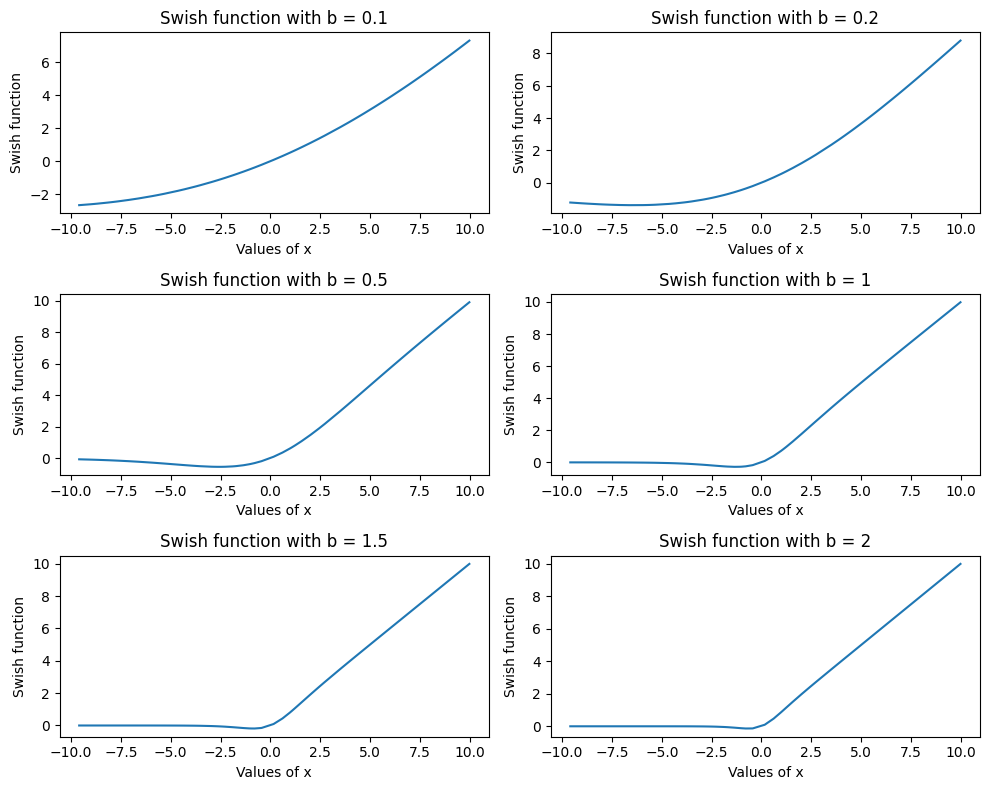

<Figure size 640x480 with 0 Axes>

In [ ]:
# create Swish function
def swish(x, b):
  return x*sigmoid(b*x)

# plotting for Swish function
# select arbitrary beta list for the swish function
b_list = [0.1,0.2,0.5,1,1.5,2]
fig, ax = plt.subplots(3,2, figsize = (10,8))
ax = ax.ravel()
for i,b in enumerate(b_list):
  ax[i].plot(np.sort(r_list), (swish(np.sort(r_list),b)))
  ax[i].set_title(f'Swish function with b = {b}')
  ax[i].set_xlabel('Values of x')
  ax[i].set_ylabel('Swish function')

plt.tight_layout()
plt.show()
plt.savefig('Swish.png')


*In case of Image Classification (as also researched by Google), swish activation function performs better in ImageNet and other Artificial Neural Networks which suffer from vanishing gradient issues*


In [ ]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset


%matplotlib inline
%load_ext autoreload
%autoreload 2


# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes =
load_dataset()

"""
________________________________________________________________________________
PRE-PROCESSING OF THE DATASET (begin)
________________________________________________________________________________
"""

m_train = train_set_x_orig.shape[0]  # Number of training examples
m_test = test_set_x_orig.shape[0]    # Number of test examples
num_px = train_set_x_orig.shape[1]   # Height (and width) of a training image

print("Number of training examples: m_train = " + str(m_train))
print("Number of testing examples: m_test = " + str(m_test))
print("Height/Width of each image: num_px = " + str(num_px))
print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print("train_set_x shape: " + str(train_set_x_orig.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x shape: " + str(test_set_x_orig.shape))
print("test_set_y shape: " + str(test_set_y.shape))

# Reshape the training and test examples

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T


print("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print("test_set_y shape: " + str(test_set_y.shape))


# Standardizing the dataset
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

"""
________________________________________________________________________________
General Architecture of the Learning Algorithm
________________________________________________________________________________
"""
def sigmoid(z):

    s = 1 / (1 + np.exp(-z))

    return s

print("sigmoid([0, 2]) = " + str(sigmoid(np.array([0, 2]))))

x = np.array([0.5, 0, 2.0])
output = sigmoid(x)
print(output)

"""
________________________________________________________________________________
Parameter Initialization (begin)
________________________________________________________________________________
"""
def initialize_with_zeros(dim):

    w = np.zeros((dim, 1))
    b = 0.0

    return w, b

dim = 2
w, b = initialize_with_zeros(dim)

assert type(b) == float
print("w = " + str(w))
print("b = " + str(b))

"""
________________________________________________________________________________
Forward/Backwards propagation (begin)
________________________________________________________________________________
"""

def propagate(w, b, X, Y):

    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A - Y)

    cost = np.squeeze(np.array(cost))

    grads = {"dw": dw,
             "db": db}

    return grads, cost

w = np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)

assert type(grads["dw"]) == np.ndarray
assert grads["dw"].shape == (2, 1)
assert type(grads["db"]) == np.float64


print("dw = " + str(grads["dw"]))
print("db = " + str(grads["db"]))
print("cost = " + str(cost))

"""
________________________________________________________________________________
Optimization (begin)
________________________________________________________________________________
"""

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009,
             print_cost=False):

    w = copy.deepcopy(w)
    b = copy.deepcopy(b)

    costs = []

    for i in range(num_iterations):
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule (≈ 2 lines of code)
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

            # Print the cost every 100 training iterations
            if print_cost:
                print("Cost after iteration %i: %f" % (i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs


params, grads, costs = optimize(w, b, X, Y, num_iterations=100,
                                learning_rate=0.009, print_cost=False)

print("w = " + str(params["w"]))
print("b = " + str(params["b"]))
print("dw = " + str(grads["dw"]))
print("db = " + str(grads["db"]))
print("Costs = " + str(costs))

"""
________________________________________________________________________________
Predict (begin)
________________________________________________________________________________
"""

def predict(w, b, X):

    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    print("Shape of w:", w.shape)
    # Compute vector "A" predicting the probabilities of a cat  in the picture
    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):

        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
        # Y_prediction[A > 0.5] = 1<----vectorized version

    return Y_prediction


w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2], [1.2, 2., 0.1]])
print("predictions = " + str(predict(w, b, X)))

"""
[OUT]:
Shape of w: (2, 1)
predictions = [[1. 1. 0.]]
Shape of w: (3, 1)

"""
"""
________________________________________________________________________________
Merge all functions into a model
________________________________________________________________________________
"""

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000,
          learning_rate=0.5, print_cost=False):

    w, b = initialize_with_zeros(dim=X_train.shape[0])
    # Gradient descent
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations,
                                    learning_rate, print_cost)
    # Retrieve parameters w and b from dictionary "params"
    w = params["w"]
    b = params["b"]
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 -
                                            np.mean(np.abs(Y_prediction_train -
                                                           Y_train)) * 100))


print("test accuracy: {} %".format(100 -

                                   np.mean(np.abs(Y_prediction_test -

                                                  Y_test)) * 100))    d =
{"costs":

 costs,

 "Y_prediction_test": Y_prediction_test,

 "Y_prediction_train": Y_prediction_train,
 "w":
 w,
 "b":
 b,

 "learning_rate": learning_rate,

 "num_iterations": num_iterations}
return d


model_test(model)
"""
[OUT]:
    All tests passed!  :D
"""

.
.
.
.
.
.
.


def model(X, y, num_iterations=1000, learning_rate=0.01):
    # Initialize parameters
    w = np.zeros((dim, 1))
    b = 0.0

    for i in range(num_iterations):
        # Forward propagation
        Z = np.dot(W.T, X) + b
        A = sigmoid(Z)

        # Cost and gradient calculation
        cost = -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
        dw = 1/m * np.dot(X, (A - y).T)
        db = 1/m * np.sum(A - y)

        # Gradient descent
        W = W - learning_rate * dw
        b = b - learning_rate * db

        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")

    return W, b
